<a href="https://colab.research.google.com/github/bsikdar1986/IISc_Assignment/blob/main/Brindaban_M8_SNB_MiniProject_3_BitCoin_Forecasting_ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Bitcoin price forecasting using ARMA

**DISCLAIMER:** THIS NOTEBOOK IS PROVIDED ONLY AS A REFERENCE SOLUTION NOTEBOOK FOR THE MINI-PROJECT. THERE MAY BE OTHER POSSIBLE APPROACHES/METHODS TO ACHIEVE THE SAME RESULTS.

## Learning Objectives

At the end of the experiment, you will be able to :

* perform EDA on time series data
* analyze the auto correlation and partial auto correlation plots
* implement the ARMA model and forecast the bit coin price

## Dataset



Bitcoin is a digital currency created in January 2009. It follows the ideas set out in a whitepaper by the mysterious and pseudonymous Satoshi Nakamoto. The identity of the person or persons who created the technology is still a mystery. Bitcoin offers the promise of lower transaction fees than traditional online payment mechanisms and, unlike government-issued currencies, it is operated by a decentralized authority.

Data Description
This dataset provides the history of daily prices of Bitcoin. The data starts from 17-Sep-2014 and is updated till 09-July-2021. All the column descriptions are provided below.

* Date: Day/Month/Year
* Open: Price from the first transaction of a trading day
* High: Maximum price in a trading day
* Low: Minimum price in a trading day
* Close: Price from the last transaction of a trading day
* Adj Close: Closing price adjusted to reflect the value after accounting for any corporate actions
* Volume: Number of units traded in a day

## Problem Statement

Perform EDA and forecast the Bitcoin price using ARMA model on timeseries (bitcoin) data.

## Grading = 10 Points

In [ ]:
#@title Download Dataset
!wget -qq !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/BTC.csv
print("Dataset downloaded successfully!!")

Dataset downloaded successfully!!


In [ ]:
## New
!pip install statsmodels --upgrade

### Import required Packages

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import itertools
import statsmodels as st

### Load the data and perform EDA [2 Points]

Hint: Refer to this ['Bitcoin dataset EDA'](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module6/M6_SNB_MiniProject_3_BitCoin_Forecasting_ARMA_Exploratory%20Data%20Analysis.pdf)

In [ ]:
# reading the .csv file
path = "/content/BTC.csv"
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2515,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10
2516,2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,4.003086e+10
2517,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10
2518,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,3.873408e+10


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',drop=True, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


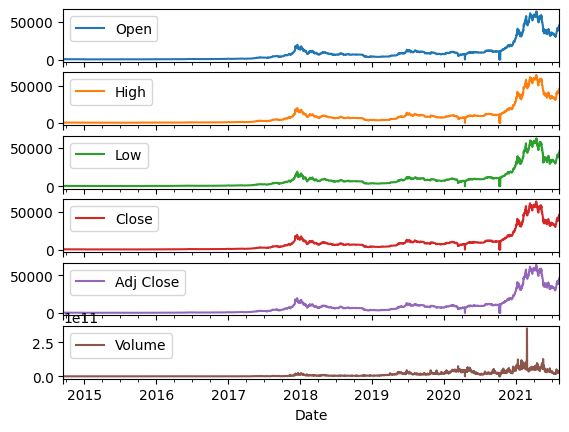

In [ ]:
# plotting multiple variables
df.plot(subplots=True)
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

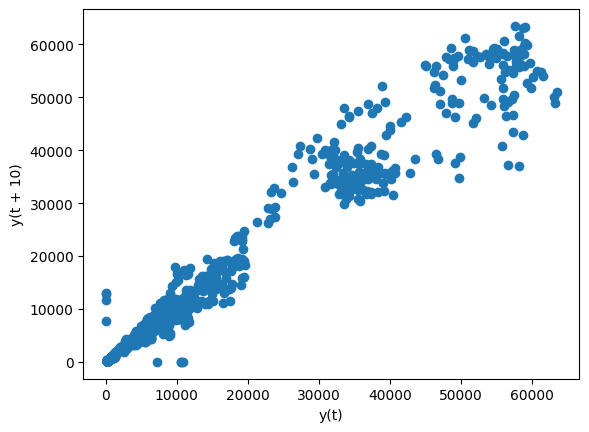

In [ ]:
pd.plotting.lag_plot(df['Close'], lag=10)

#### Analyze the correlation (heatmap) of all the features

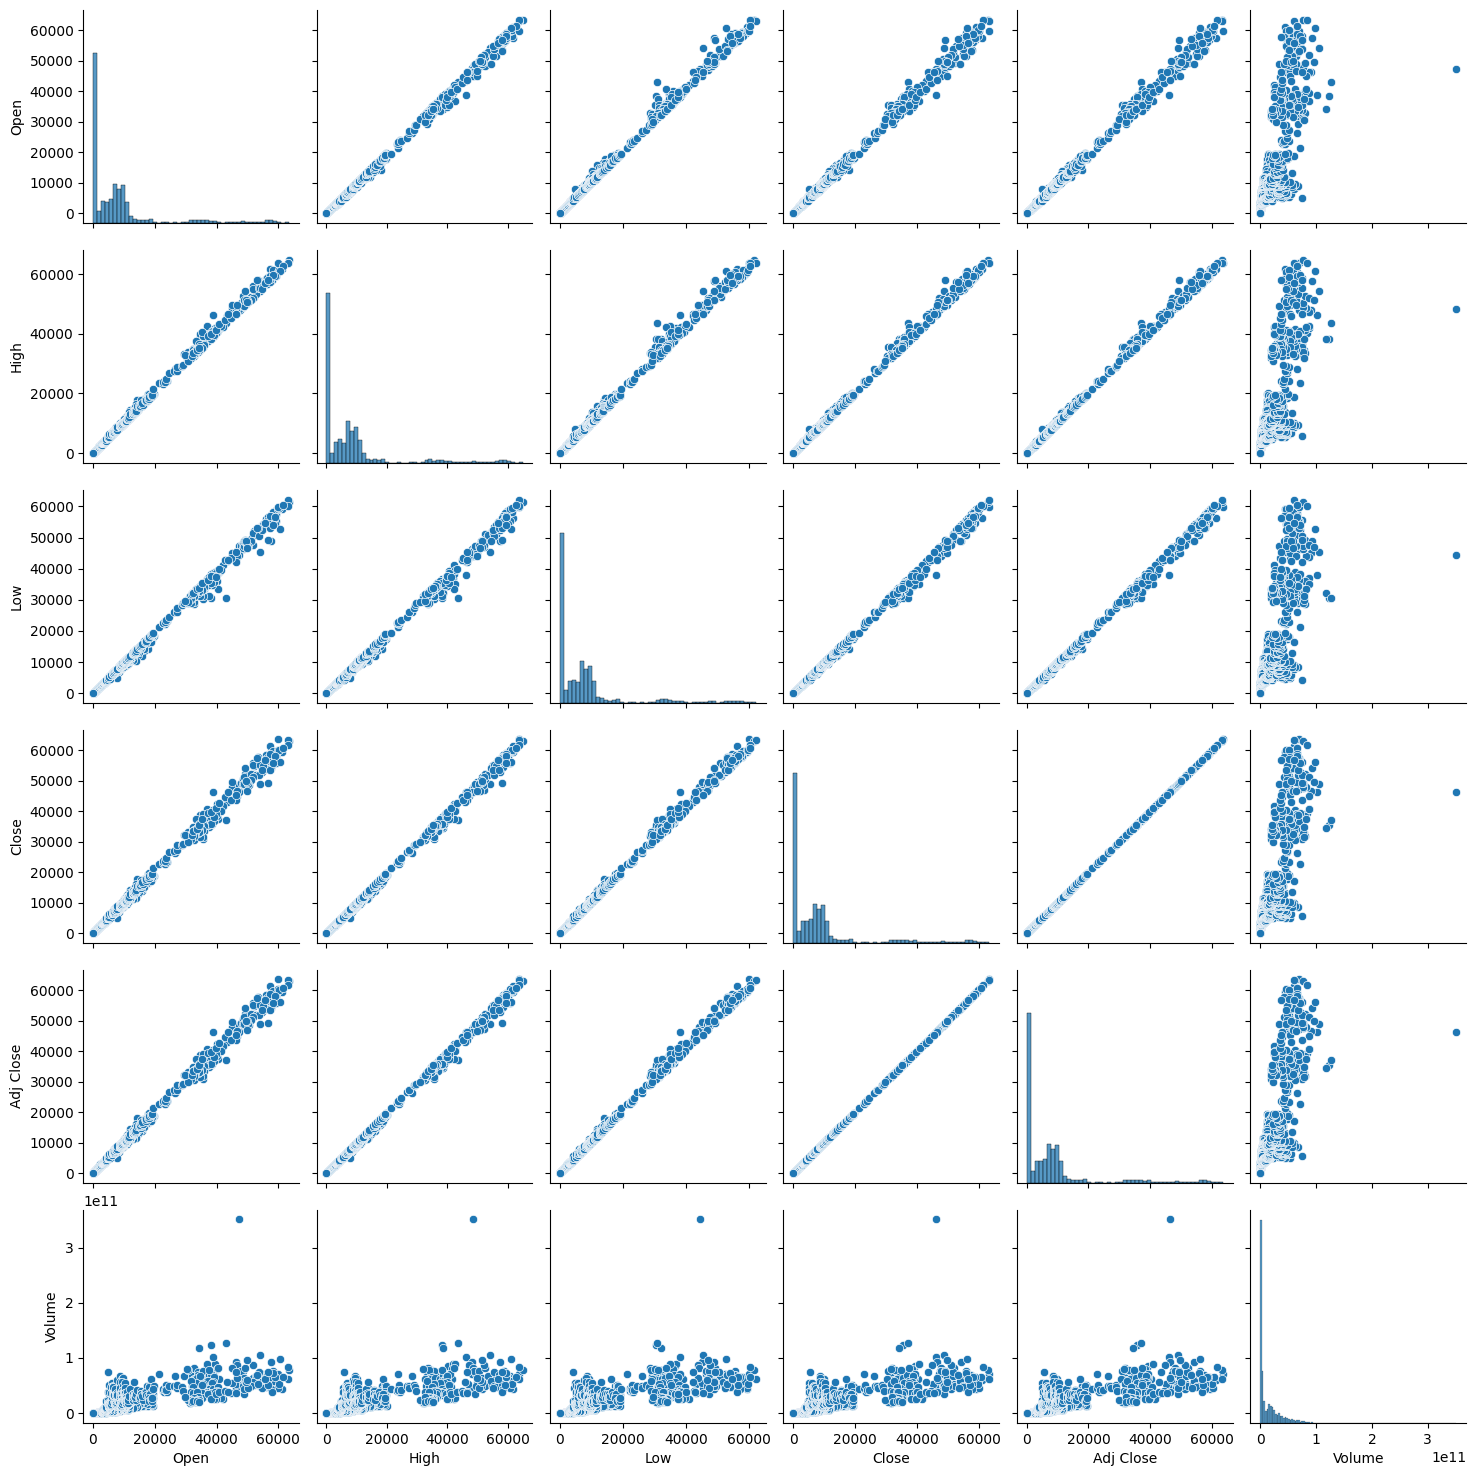

In [ ]:
import seaborn as sns
g = sns.pairplot(df[df.columns])

By this we can observe the correlation between the features.

We can also find the values of correlation by using pearson correlation matrix.

In [ ]:
aq_pear_corr = df[df.columns].corr(method='pearson')
aq_pear_corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999412,0.998898,0.998608,0.998608,0.791871
High,0.999412,1.000000,0.998813,0.999399,0.999399,0.794312
Low,0.998898,0.998813,1.000000,0.999259,0.999259,0.785560
Close,0.998608,0.999399,0.999259,1.000000,1.000000,0.790461
Adj Close,0.998608,0.999399,0.999259,1.000000,1.000000,0.790461
Volume,0.791871,0.794312,0.785560,0.790461,0.790461,1.000000


<Axes: >

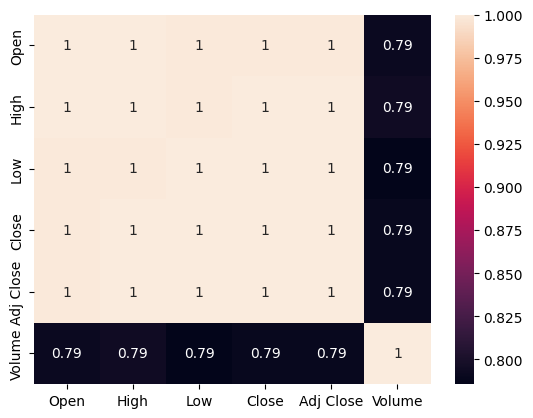

In [ ]:
sns.heatmap(aq_pear_corr,annot=True)

Almost all the features posses same information, so we can select any of the given variables

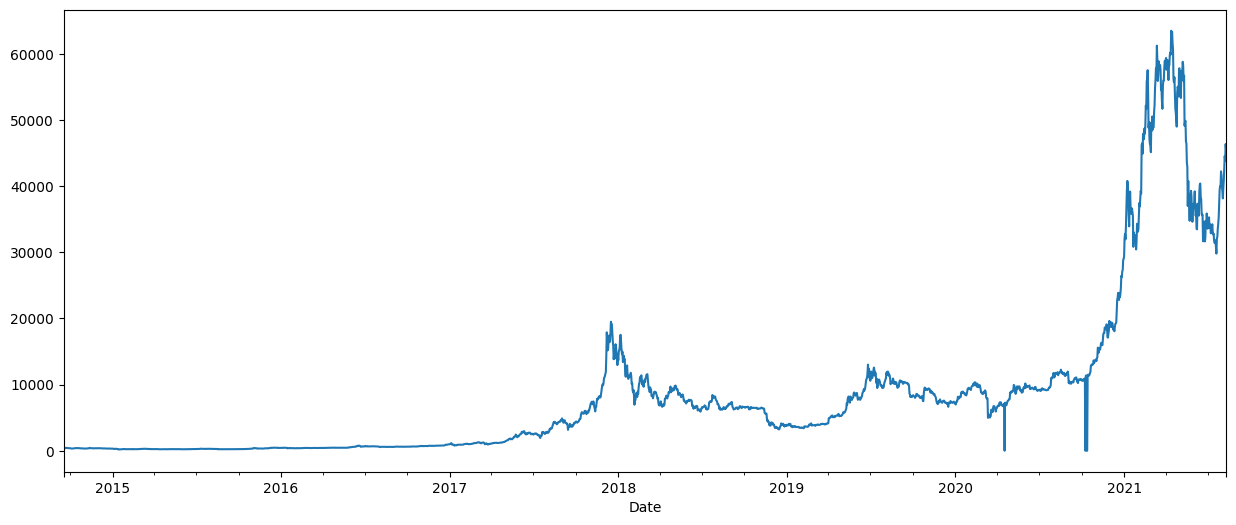

In [ ]:
df['Close'].plot(figsize=(15,6))
plt.show()

### Testing the Stationarity using Augmented Dicky Fuller Test [1 Point]

The Augmented Dicky Fuller test is a type of statistical test called a unit root test.

Hint: [tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [ ]:
#Perform Dickey Fuller test
result = adfuller(df['Close'])
print('ADF Stastistic: %f'%result[0])
print('p-value: %f'%result[1])
pvalue = result[1]
for key,value in result[4].items():
  if result[0]>value:
    print("The graph is non stationery")
    break
  else:
    print("The graph is stationary")
    break;
print('Critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f ' % (key, value))

ADF Stastistic: -0.022722
p-value: 0.956612
The graph is non stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


### Identify the trends and seasonality from the given time series data [2 points]

* Apply seasonal decompose and plot the results
* Check the stationarity of data using rolling mean and rolling standard deviation.
* Make the time series data stationary
  * Apply a log transformation to reduce the variance of the series
  * Eliminate the Trend and Seasonality by Differencing

**Note:** Ensure timeseries without NaN, inf, -inf values, Replace with 0 if found.

Read more about stationarity of a timeseries in the following [link](https://machinelearningmastery.com/time-series-data-stationary-python/)

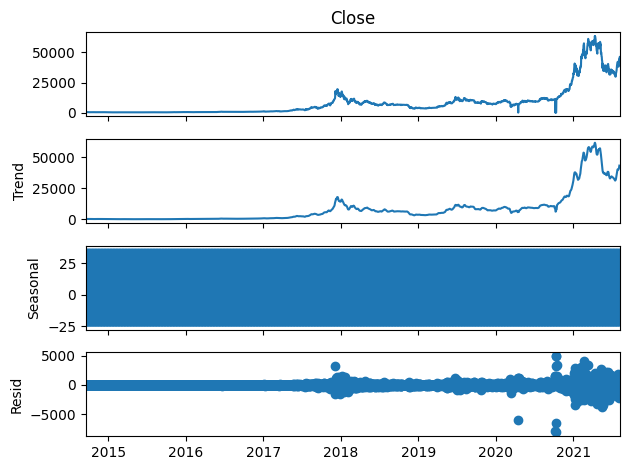

In [ ]:
ts = df['Close']
# ETS Decomposition
result = seasonal_decompose(ts)
# ETS plot
result.plot();

<Figure size 3000x1000 with 0 Axes>

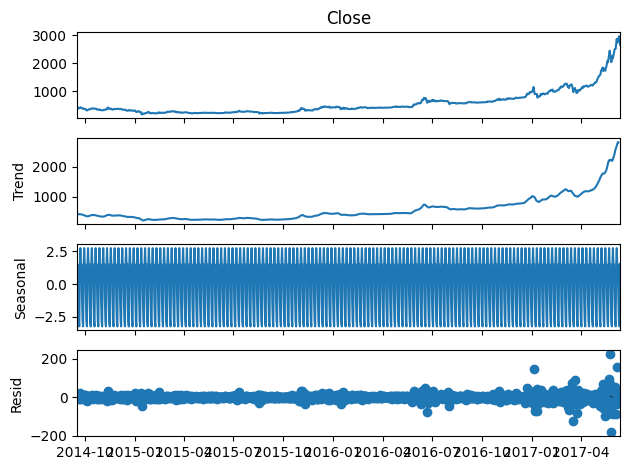

In [ ]:
# ETS Decomposition
plt.figure(figsize=(30,10))
result = seasonal_decompose(ts[:1000])
# ETS plot
result.plot();

In [ ]:
# Let’s create a function to run the test which determines whether a given time series is stationary
def get_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=24).mean()
    rolling_std = timeseries.rolling(window=24).std()

    # Rolling statistics plot
    plt.figure(figsize=(15,5))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

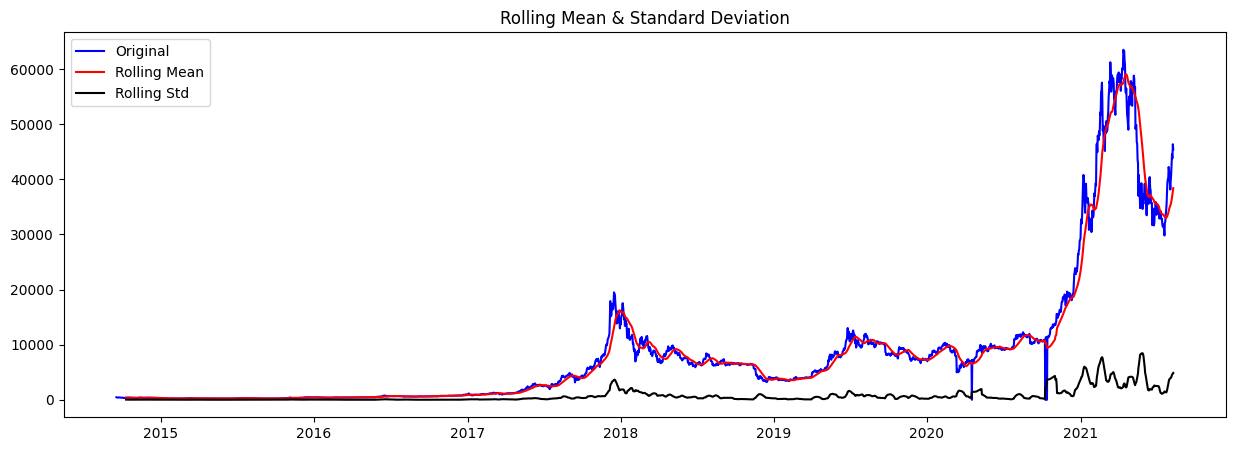

In [ ]:
get_stationarity(df['Close'])

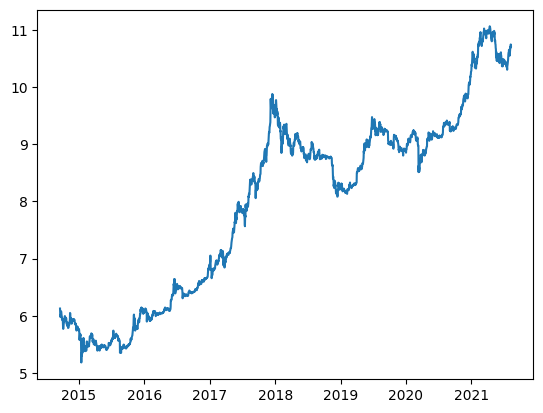

In [ ]:
# ESTIMATING THE TREND
# Applying a log transformation is a way to reduce the variance of the series
df_log = np.log(df['Close'])
plt.plot(df_log);

In [ ]:
# replacing -inf values with 0
print(df_log.min())
df_log.replace(-np.inf, 0,inplace=True)
df_log.min()

-inf


0.0

Eliminating the Trend and Seasonality by **Differencing** (taking the difference with a particular time lag)

In [ ]:
shift_df = pd.concat([df_log, df_log.shift(7)],axis=1)
shift_df.columns = ['Actual','Forecasted']
shift_df.head()

,Actual,Forecasted
Date,,
2014-09-17,6.125414,NaN
2014-09-18,6.050771,NaN
2014-09-19,5.978369,NaN
2014-09-20,6.013480,NaN
2014-09-21,5.988513,NaN


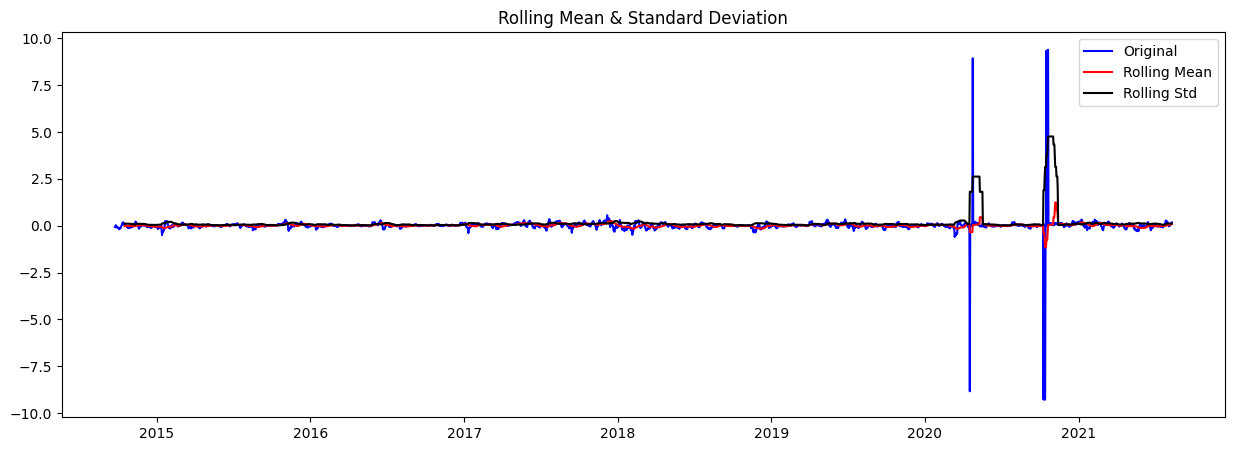

In [ ]:
df_log_shift = shift_df['Actual'] - shift_df['Forecasted']
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [ ]:
time_series = df_log#['Close']
time_series = time_series.diff(7).dropna()

### Test the Stationarity using Augmented Dicky Fuller Test [1 point]

Verify the stationarity post differencing, using ADF

Hint: [tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [ ]:
#Perform Dickey Fuller test
result=adfuller(time_series)
print('ADF Stastistic: %f'%result[0])
pvalue=result[1]
print('p-value: %f'%pvalue)

for key,value in result[4].items():
      if result[0]>value:
        print("The graph is non stationery")
        break
      else:
        print("The graph is stationary")
        break;
print('Critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f ' % (key, value))

ADF Stastistic: -13.464147
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


### Auto Correlation Plot [1 point]

Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.  The concept of autocorrelation is most often discussed in the context of time series data in which observations occur at different points in time.

* Plot the auto correlation function (ACF and PACF)
* Analyse ACF and PACF plots and define AR (p) and MA(q) terms

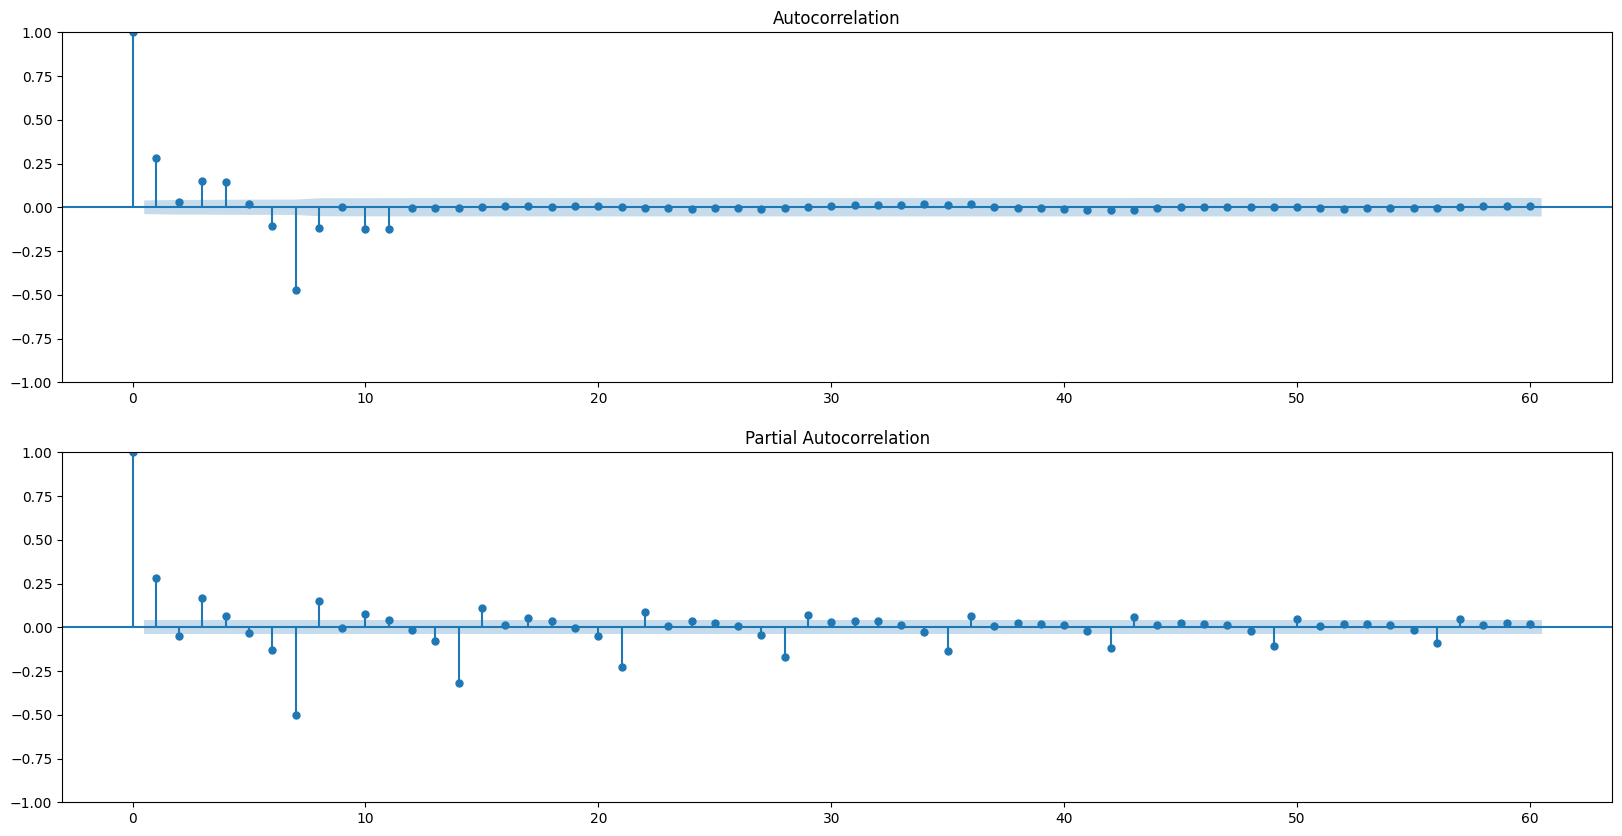

In [ ]:
# let us plot acf and pacf graphs
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (20,10))
plt.subplot(211)
plot_acf(time_series, ax=plt.gca(), lags = 60)
plt.subplot(212)
plot_pacf(time_series, ax=plt.gca(), lags = 60)
plt.show()

**Analysing ACF and PACF plots for Identifying the number of AR and MA terms (p and q)**

- The lag beyond which the PACF cuts off is the indicated number of AR terms (p).
- The lag beyond which the ACF cuts off is the indicated number of MA terms (q).

### Train the AR model [1 Point]

In [ ]:
regr = st.tsa.ar_model.AutoReg(time_series, lags = 7).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


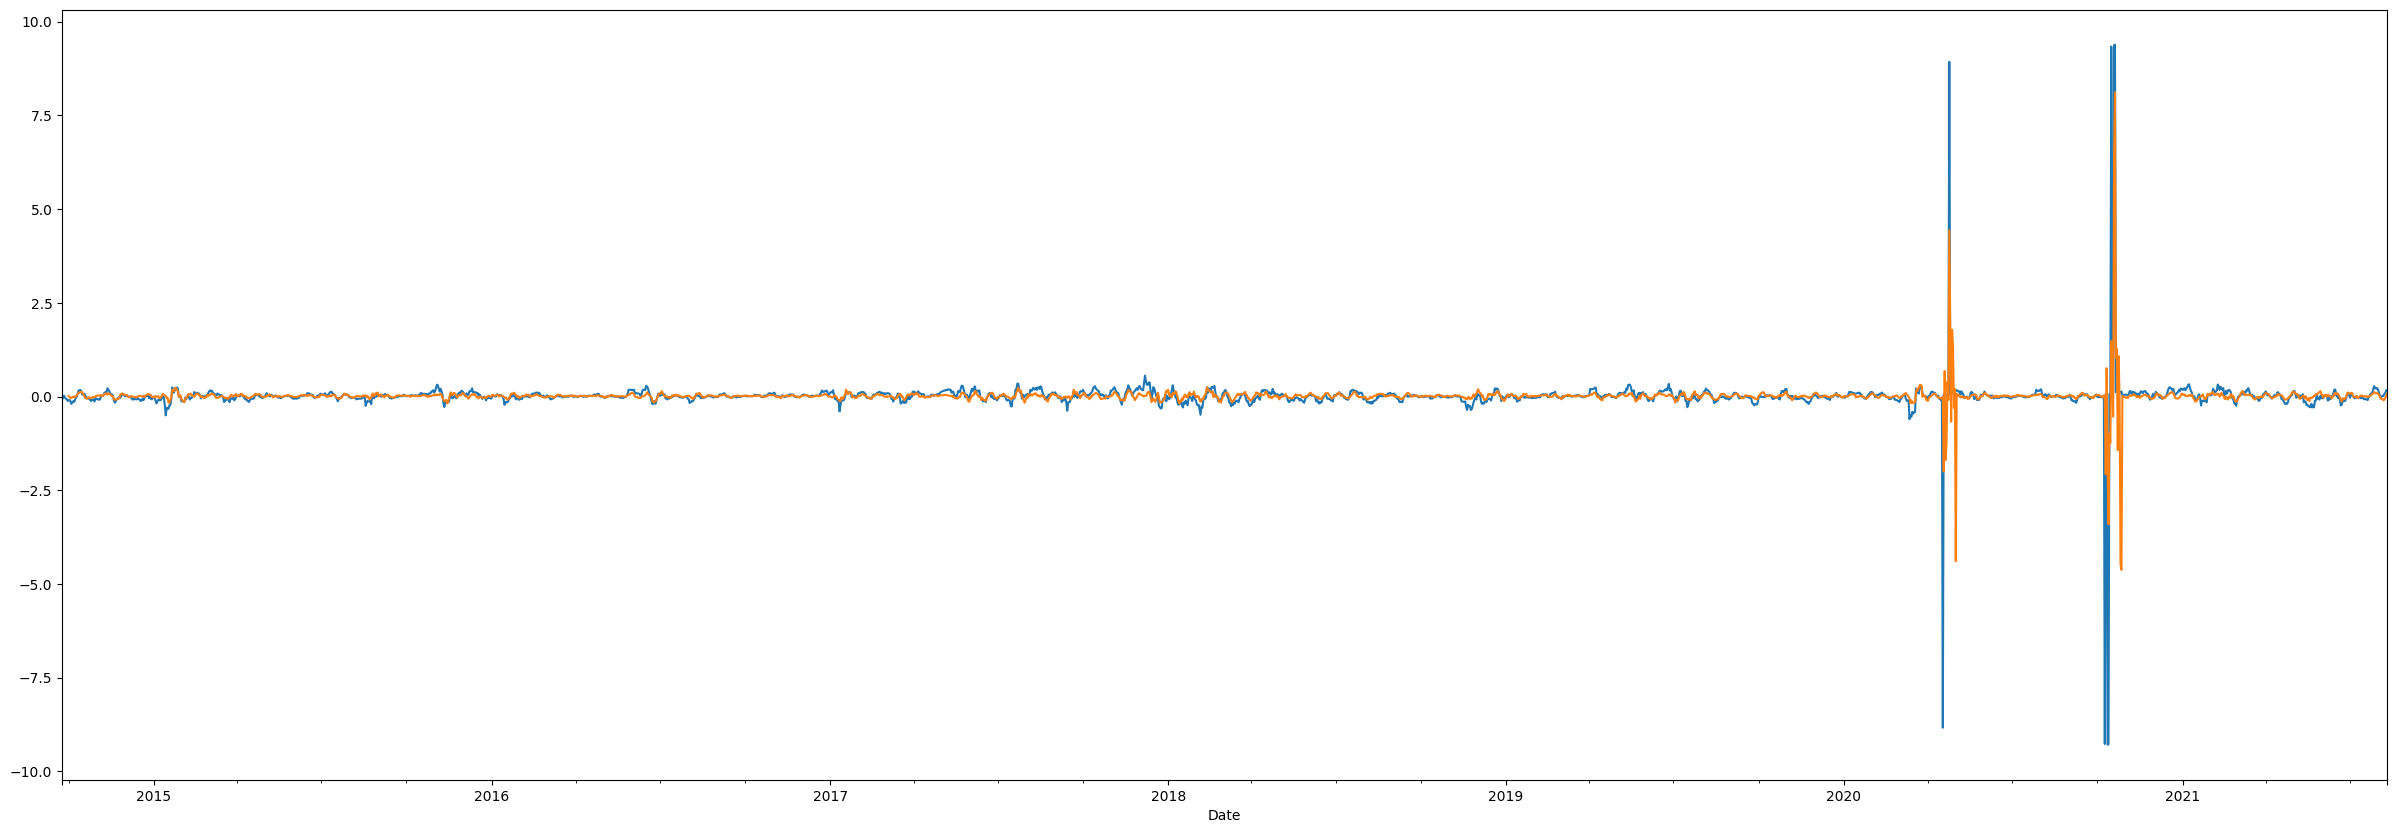

In [ ]:
#regr = st.tsa.ar_model.AutoReg(time_series, lags = 7)
fore = regr.predict()

time_series.plot()
fore.plot(figsize=(30,10))
plt.show()

### ARMA Model [1 Point]

* Fit the ARMA model on train data and forecast the test data

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# ARMA Method - 1
from math import sqrt
from sklearn.metrics import mean_squared_error

# ARMA model
model = ARIMA(time_series, order=(4, 0, 1))
model_fit = model.fit()
print(model_fit.aic)

predictions = model_fit.predict()
error = sqrt(mean_squared_error(time_series, predictions))
print('RMSE value: %.3f' % error)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


3581.7194353498144
RMSE value: 0.492


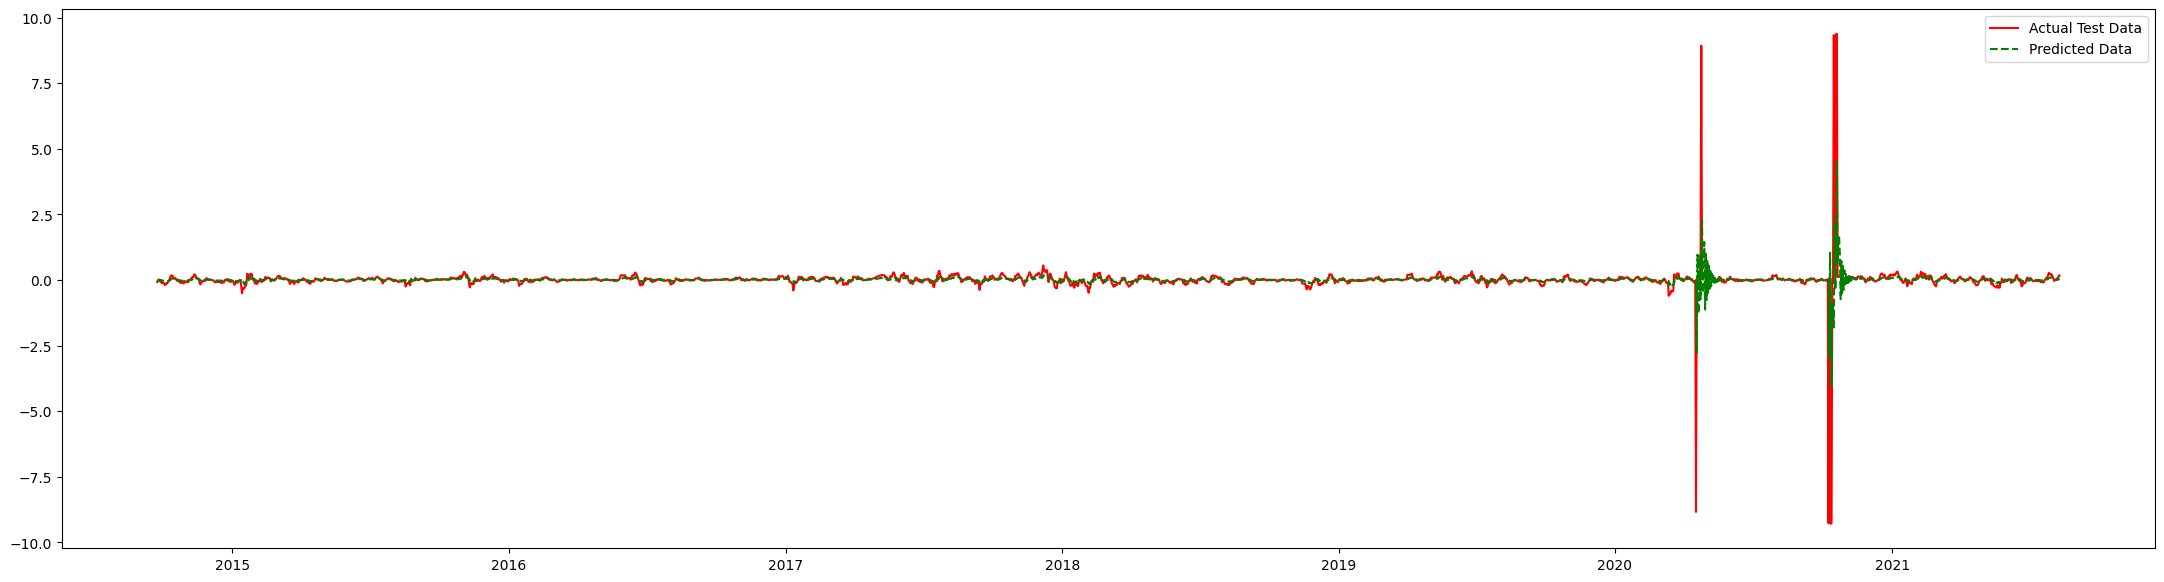

In [ ]:
plt.figure(figsize=(27,7))
plt.plot(time_series.index, time_series, color='red', label='Actual Test Data')
plt.plot(time_series.index, predictions, color='green', linestyle='dashed', label='Predicted Data')
plt.legend();
plt.show()

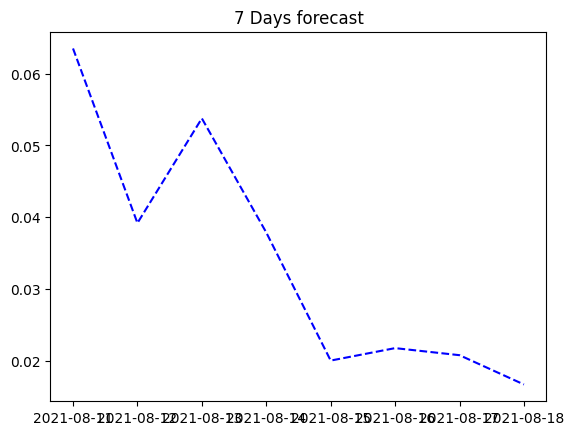

In [ ]:
future = model_fit.predict(start=len(time_series),end=len(time_series)+7)
plt.title("7 Days forecast")
plt.plot(future.index, future, color='blue', linestyle='dashed')
plt.show()

### ARMA model in iterative process

In [ ]:
# split the data into train and test
train_ar = time_series[:int(len(time_series)*0.9)]
test_ar = time_series[int(len(time_series)*0.9):]

In [ ]:
len(train_ar), len(test_ar)

(2261, 252)

In [ ]:
# ARMA Method - 2
history = [x for x in train_ar.values]
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(4, 0, 1))
    model.initialize_approximate_diffuse()
    model_fit = model.fit()
    output = model_fit.forecast() # one-step forecast
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar.values[t]
    history.append(obs)
    print(model_fit.aic)

3516.6813035669375
3517.208843025007
3517.7687138226356
3518.2971493901373
3518.8336879721583
3519.3559173621297
3519.890508354126
3520.4160561922863
3520.9456564031652
3521.4798320507175
3522.000369113588
3522.5206096560814
3523.039217235577
3523.557496995986
3524.0859285039487
3524.653781306538
3525.289732895985
3525.924230849395
3526.5268506067832
3527.084612436147
3527.618994154046
3528.1832435024617
3528.6981255835262
3529.212371184015
3529.726572704395
3530.249530551385
3530.7844113286255
3531.355133435417
3531.8878557016224
3532.4914302326433
3533.0489065342185
3533.5906250550725
3534.155550764284
3534.7186344654556
3535.2524702294936
3535.8309293015986
3536.4196188304213
3537.0813600110046
3537.765814138107
3538.3035017299267
3538.8238506320363
3539.3304053174793
3539.857981424032
3540.3650636409398
3540.87640258066
3541.430493066252
3541.958714457429
3542.476744285865
3542.990721264735
3543.507317159163
3544.0217641932477
3544.7208504695263
3545.23756655288
3545.7902332830263


#### Plot the predictions for timeseries data [1 point]

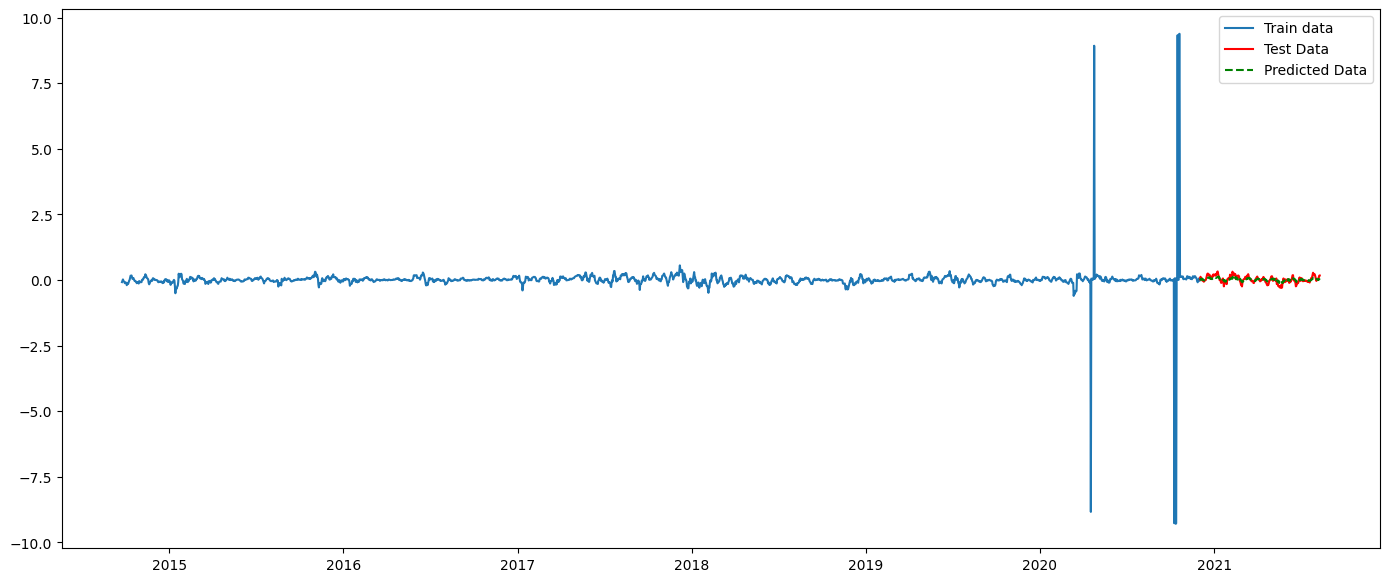

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(train_ar.index,train_ar,label="Train data")
plt.plot(test_ar.index, test_ar, color='red', label='Test Data')
plt.plot(test_ar.index, predictions, color='green', linestyle='dashed', label='Predicted Data')
plt.legend();

### Report Analysis

* Discuss how sudden effects of bitcoin price effects the model parameters
* State your observations about the trend and seasonality of the timeseries data
* Discuss how you selected ARMA (p, d and q) terms.
* Interpret the AIC value obtained for the ARMA model

:Internal Reference: https://cdn.iisc.talentsprint.com/CDS/Assignments/Module6/M6_SNB_MiniProject_3_BitCoin_Forecasting_ARMA_Internal%20Reference.pdf


#### ARIMA model

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(time_series,order=(4,0,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2513
Model:                 ARIMA(4, 0, 1)   Log Likelihood               -1783.860
Date:                Thu, 13 Mar 2025   AIC                           3581.719
Time:                        04:29:56   BIC                           3622.524
Sample:                    09-24-2014   HQIC                          3596.530
                         - 08-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.019      0.699      0.485      -0.023       0.049
ar.L1         -0.5225      0.011    -45.747      0.000      -0.545      -0.500
ar.L2          0.1547      0.011     14.470      0.000       0.134       0.176
ar.L3          0.0551      0.009      6.416      0.000       0.038       0.072
ar.L4          0.2440      0.003     81.394      0.000       0.238       0.250
ma.L1          0.8373      0.012     67.641      0.000       0.813       0.862
sigma2         0.2421      0.001    322.955      0.000       0.241       0.244
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):           9310902.46
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):             202.57   Skew:                             1.91
Prob(H) (two-sided):                  0.00   Kurtosis:                       301.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(model_fit.aic)

predictions = model_fit.predict()
error = sqrt(mean_squared_error(time_series, predictions))
print('RMSE value: %.3f' % error)

3581.7194353498144
RMSE value: 0.492
